# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [13]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [14]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 

For inrease in value of MEDV : 
1. *increse in RM * - Larger number of rooms, means the house would be larger.Hence the land it occupies , counstruction cost is more, material used is more. So increase in RM increases the cost.
    
2. If the PTRATIO was initially very low and then it increses so does the PTRATIO.This is because say if the ratio is very low then this would mean that not many students preffer this education system. The quality of education might not be good. Now as PTRATIO increases so would the price of houses such schools.


For decrease in value of MEDV: 
1. Increse in the value of LSTAT. When LSTAT is low then that would mean that the percentage of of homeowners in the neighbourhood considered "low class" is less, so the price of houses would be higher. But as LSTAT increase the price go down.

2. If the PTRATIO was initially high enough and this ratio keeps increasing futher. If PTRATIO is very high then that would mean that in each class the number of children is large. A very high ratio would mean that teacher would not be able to pay individual attention to each child. 


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [15]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    print (score)
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [16]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


**Answer:** 0.923

R squared is a measure of the variance in the dependent variable ,which is dependent on the independent variabel. As the R squared value is high, this model is able to capture the varience in the dependent variable successfully.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split 
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 34)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Split of data into training and test set lets us, check the accuracy of our prediction after training our algorithum on the  training data. After training algorithum prediction is done for each data point in the test set and the predicted outcome is compared to the actual outcome. The comaprison of predictes vs actual outcome gives us the measure of accuracy of our model.

If we don't split the data and use the same data for measuring the correctness then we would not get any sustantial results, this can be considered a case of overfitting the data. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

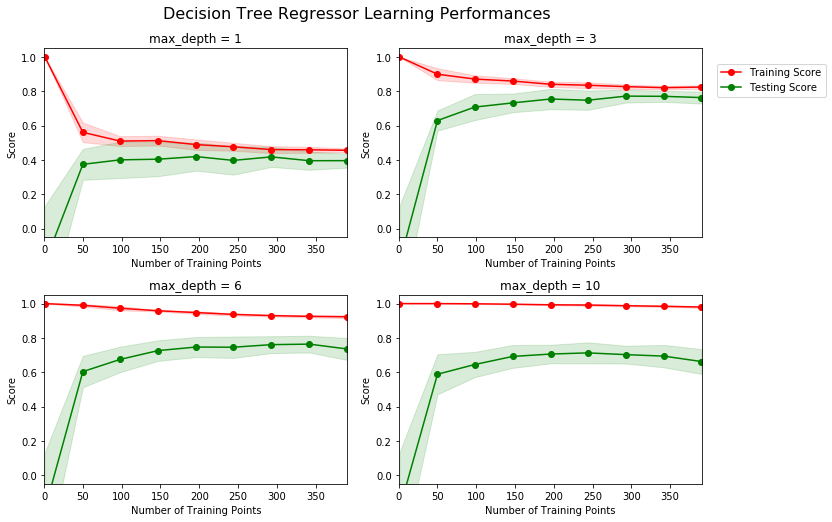

In [18]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Model Choosen : max_depth = 6

For training score - As more training point are added there is slight decrease in the training score. As the number of training points increase the influence on the training score decreases.

For testing score - When more training points are added to inintial number(i.e lower number of training points) the testing score drastically increases, but when we have sufficient number of training points and more are added then there is a slight to no increase in the testing score. 

Having more testing point would not benefit the model a lot, as both curves tend to a value of 0.8 as the number of points increase. After addition of sufficient number of points there is not much change in the value.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

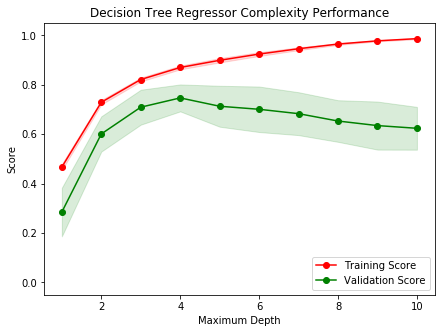

In [19]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When max depth is 1 then the model suffers from bias, this is because because of the low complexity of the model, the data even when different are classified the same. The simplicity of the model does not let the model distinguish data on certain features. * Visual Cue : Validation Score and the traning score are both low , this shows that the model is not able to classify the training data or the test data. This is because the model is very simple.* 

When the max depth is 10 then the model suffers from high varience. The model is very complex for the data. The high complexity makes the model make wrong prediction.* Visual Cue : Training score is near 1 which shows that the model can classify the training data correctly. But as the Validation Score is less this shows that on encountering new data , becasue the model is very complex it is unable to predict correctly. *

The data would be best classified from a model with intermediate complexity,in this case modle with complexity with ' ' maximum depth ' in the range 3 - 4. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

Maximum Depth of 4 is the best for generalizing the unseen data. At maximum depth 4 the model has highest validation score of ~0.75. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search helps optimize learning algorithums and improve their performance. It tunes choosen parameters to the most optimised values. It dose so by creating a grid of values and then cross validating for all these values. After cross validation it then outputs the value of the parameter for which the model would be most precise in predicting


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

Grid Search splitls the entire data into two sets. The training and test set. It trains model on the training set and uses test set to fine tune parameters.

Major drawback of the Grid Serach is that it splits the entire data into two different sets (training and testing) once and uses these to fine tune parameters. But, if say the split was such that we were able to capture only one particular type of data and not a diverse mixture then model suffers from underfitting. To combat this k-fold-cross-validation is used.

k-fold-cross-validation technique is the technique of creating k equal groups of data and then perform cross validation with each k as the test set (remaining become the training set). Average result for all the k - folds is the final answer. 

Using k-fold-cross-validation with grid search, tunes parameters to mutiple training sets and test on multiple sets. Tuning on multiple,different training sets is closer to real world scenario of new, unseen data. Because due to multiple different trainig and testing data the probability of model covering more diverse type of data is larger as compared to just one train-test split. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [39]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV 
from sklearn import svm 

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring_fnc,cv = cv_sets) #Including cv_sets --> This is important as these are the sets for training and testing 

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [40]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

0.348290172873
0.371465501417
0.377612108997
0.344562656517
0.318492868567
0.295054773095
0.188488228591
0.0428536324599
0.237227465086
0.324812246607
0.564805004168
0.659080818107
0.727353942252
0.632142081061
0.609730045216
0.613799632262
0.488104702783
0.486927511474
0.575674933203
0.651791234375
0.722578450168
0.779914249072
0.81637513365
0.721758910375
0.583540098462
0.743330465599
0.572709941227
0.616674801049
0.740679839446
0.735441811091
0.775983298532
0.814070430579
0.826574469756
0.795228252045
0.65380869766
0.722715665178
0.69001525444
0.676261666521
0.743477432833
0.701408330202
0.771191865275
0.791084101879
0.831349323975
0.79497360746
0.644895501915
0.586086784093
0.627372592234
0.630613487685
0.782393570374
0.695837251323
0.781658940539
0.801863928439
0.820239468252
0.769024188215
0.581749637678
0.578090925897
0.606215146581
0.583149396022
0.754193024884
0.699024930856
0.751576608521
0.772250209808
0.788112981975
0.730846053259
0.579588661009
0.571211157696
0.56345652786

**Answer: ** 

Maximum_depth of the optimal model = 4 , From the Decission 'Tree Regressor Complexity Performance' graph the optimal max_depth seemed 4(Ans 6) but even tough the training set changes for Question 9 changed Decision Tree Regressor with max_depth = 4 is most optimised , the max_depth is fine tuned for that data set and gives same value.  

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [35]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $401,362.50
Predicted selling price for Client 2's home: $216,183.33
Predicted selling price for Client 3's home: $941,500.00


**Answer: **

*For Client 1* The price point of $401,362.50 seems reasonble,because:-
1. The price is greater than minimum and smaller than maximum
2. The room has only 5 beds and only for that feature only the price is high ,but as the Neighborhood poverty level is 
   low the price increses. Also the student - to - teacher is not very low or very high so this also increases the       price  

*For Client 2* The price point of $216,183.33 seems reasonable because:-
1. The price is greater than minimum and smaller than maximum
2. The price is low if we only see the number of rooms.
3. But this house has a high value for Neighborhood poverty level , also the student-to-teacher ratio is high . Because of these features the price is low 

*For Client 3* The price point of $941,500.00 seems reasonable because :-
1. The price is greater than minimum and smaller than maximum
2. The number of bedrooms is large (largest number possible is 10), the Neighborhood poverty index is very small and the student-to-teacher ratio is neither too high or too low.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [36]:
vs.PredictTrials(features, prices, fit_model, client_data)

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.742796350428
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.806953080627
0.733574735513
0.70706260164
0.671853983565
0.764594908555
0.74827346237
0.80493249823
0.754939096345
0.835389112253
0.865175501824
0.821663417405
0.720330856057
0.673855194355
0.678187314983
0.745860427496
0.763040466485
0.772500974383
0.767374361633
0.722399135659
0.860471981352
0.80157002964
0.701526763701
0.633777828285
0.655151992955
0.755134157937
0.759594035024
0.815419476004
0.787312

0.847570050544
0.775400372383
0.668529533066
0.574685125997
0.403801688106
0.787607292677
0.726190774594
0.780148832024
0.758654239023
0.652741997596
0.827071320825
0.750487981999
0.655421184811
0.602295834953
0.374213311465
0.767971700692
0.675313355563
0.744509934587
0.697401507646
0.569083906437
0.807982729107
0.737449271995
0.64773272855
0.641267280546
0.346379053497
0.75779236375
0.689514623814
0.752313845251
0.757559447161
0.614729756693
0.811067559711
0.757498640998
0.630612071573
0.576136589752
0.351210927698
0.768495801271
0.655540578654
0.727452891712
0.702687825906
0.527915492605
0.79421835413
0.760795177233
0.616852519702
0.567735790514
0.391854403944
0.78626343374
0.606338272191
0.733272310876
0.718869622364
0.605233200275
0.817006090562
0.770800791169
Trial 6: $411,931.58
0.407294527331
0.422365791278
0.295007270158
0.292890850685
0.440765120326
0.461009948513
0.470172447311
0.396693718814
0.481596617144
0.388005499003
0.732698571735
0.636857944374
0.637779542372
0.592596

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

--> Data collected in 1978 would not be much relvant to the pricing of houses today alone. This is because the over the years the market and global economy has changed. The infuence of diffrent features in the past years have changed.
But say we have data from 1978 till recent years then we can use these data to find the trend in data and accordingly make prediction.

--> In real world scenario some more features might be required to price house. For example provision of lawn can be a feature, the number floors can be a factor, availability of basic amenities is an important factor, etc.

--> The model is not robust enough. As we saw in the 'Sensitivity', the prices fluctuate when we change the training and the testing set. The Range was $28,652.84 , which shows the predictions were not consistent.

--> No, the data collected in urban city would not be applicable to a rural city.As the target audience is different, the influence of different features on the price in both regions is different.

The given model would not be suitable for real world scenario. This is because the model has not taken other features into account. Also this model does not diffrentiate how the location (rural, urban) would affect the price. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.